# Color Scheme Analysis of Popular Illustrations

##### created on 13/06/2020 by Niti Wattanasirichaigoon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image
from os import listdir
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

### Load Dataset

In [2]:
# import images and preprocess
# (dataset can be found at https://www.kaggle.com/profnote/pixiv-popular-illustrations)
path = glob.glob("../../../Osintgram/output/*.jpg") # path to local dir
new_size = (224, 224)

imgs = []
processed = 0
for name in path:
    img = Image.open(name)
    img = img.convert("RGB")
    img = np.array(img.resize(new_size))
    imgs.append(img)
    processed += 1
    if processed % 500 == 0:
        print("processed", processed, "images")
    
imgs = np.array(imgs)

processed 500 images
processed 1000 images
processed 1500 images


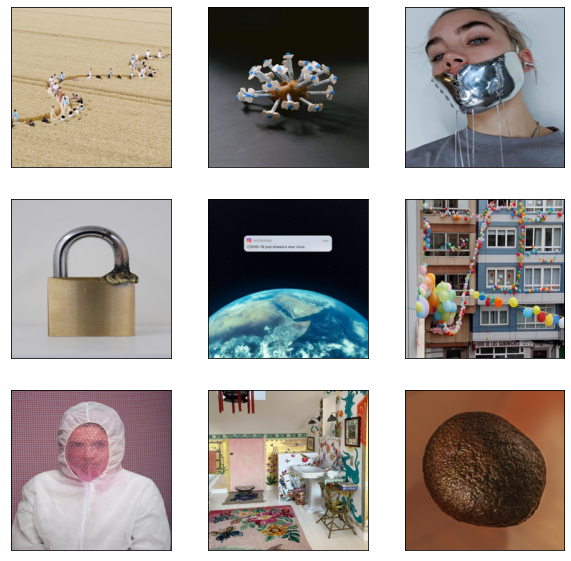

In [4]:
# visualize some images
plt.figure(figsize=(10,10))
for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i])

### Trends in Saturation and Brightness (Value)

In [5]:
# transform images from rgb into hsv
hsv_imgs = []
processed = 0
for img in imgs:
    hsv_img = rgb_to_hsv(img/255) #HSV values range = [0,1]
    hsv_imgs.append(hsv_img)
    processed += 1
    if processed % 500 == 0:
        print("processed", processed, "images")

processed 500 images
processed 1000 images
processed 1500 images


In [6]:
# Get average saturation and Value of each image
hsv_imgs = np.array(hsv_imgs)
saturation = np.mean(hsv_imgs[:,:,:,1], axis=(1,2))
Value = np.mean(hsv_imgs[:,:,:,2], axis=(1,2))
chroma = np.mean(hsv_imgs[:,:,:,1]*hsv_imgs[:,:,:,2], axis=(1,2))

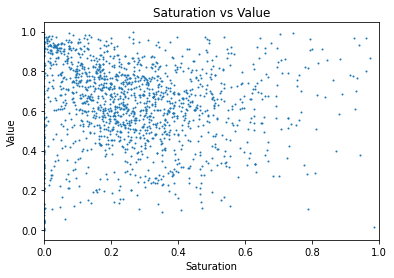

In [7]:
# Plot scatter plot
plt.plot(saturation, Value, marker='o', markersize=1, linewidth=0)
plt.title('Saturation vs Value')
plt.xlabel('Saturation')
plt.ylabel('Value')
plt.xlim(0,1)
plt.show()

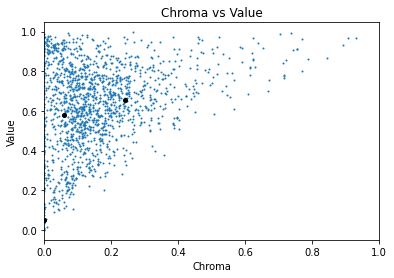

In [8]:
# Plot scatter plot - chroma
eg = [333, 493, 1400] #example illust
plt.plot(chroma, Value, marker='o', markersize=1, linewidth=0)
plt.plot(chroma[eg], Value[eg], marker='o', markersize=4, linewidth=0, color='black')
plt.title('Chroma vs Value')
plt.xlabel('Chroma')
plt.xlim(0,1)
plt.ylabel('Value')
plt.show()

### Color Clustering

#### K-Means clustering

In [9]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

img no. 12
shape: (224, 224, 3)


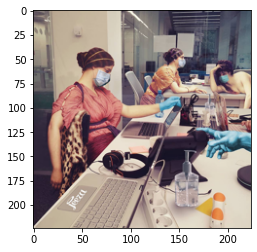

In [10]:
# get image index from file name (for testing)
#samples
# high sat high val e.g.: 46985381
# low sat high val e.g.: 40715238
# low val e.g.: 65822051
# mika pikazo e.g.: 76654781

id = 12
        
test_img = imgs[id]
print("img no.", id)
print("shape:", test_img.shape)

# view example image
plt.imshow(test_img)
plt.show()

<ipython-input-11-c13aff31252d>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


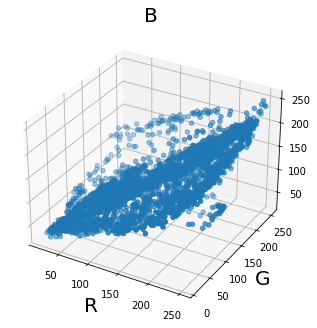

In [11]:
# plot pixels in RGB space 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_img[:,:,0][::10], test_img[:,:,1][::10], test_img[:,:,2][::10]) #plot every 10 pixels to save time
plt.xlabel('R', size=20)
plt.ylabel('G', size=20)
plt.title('B', size=20)
plt.show()

In [12]:
# K-means clustering
# code derived from https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    HEXCOLS = None
    
    def __init__(self, image, clusters=3):
        # image as numpy array (RGB)
        self.CLUSTERS = clusters
        self.IMAGE = image
        
        
    def dominantColors(self):
        img = self.IMAGE
        
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    
    def plotClusters(self):
        self.HEXCOLS = [self.rgb_to_hex(i) for i in self.COLORS]
        
        fig = plt.figure()
        ax = Axes3D(fig)
        ind = 0
        for pix in range(self.IMAGE.shape[0]//10):
            ax.scatter(self.IMAGE[pix*10][0], self.IMAGE[pix*10][1], self.IMAGE[pix*10][2], color = self.HEXCOLS[self.LABELS[pix*10]])
            percent = 0
        plt.title('Color Clusters')
        plt.show()

In [13]:
# Color cluster our test img
clusters = 10
dc = DominantColors(test_img, clusters)
colors = dc.dominantColors()
print(colors)

[[200 181 160]
 [ 43  32  50]
 [100  99 108]
 [204 133 111]
 [222 213 197]
 [ 74  62  79]
 [176 159 147]
 [144  75  78]
 [115 173 193]
 [143 127 124]]


<ipython-input-12-9e28d3edaad2>:48: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


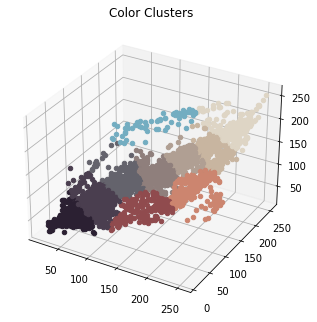

In [14]:
# View colored scatter plot
dc.plotClusters()

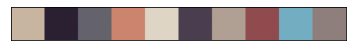

In [15]:
# function to visualize array of colors
def palette(colors):
    # input: array of RGB colors
    num_colors = len(colors)
    pal = np.zeros((100, 100 * num_colors, 3))
    for c in range(len(colors)):
        pal[:,c*100:c*100+100, 0] = colors[c][0]
        pal[:,c*100:c*100+100, 1] = colors[c][1]
        pal[:,c*100:c*100+100, 2] = colors[c][2]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pal/255)
    return 

palette(colors)

#### extcolors.py

In [16]:
!pip install -U extcolors
# or might have to download and install manually

Requirement already up-to-date: extcolors in /home/goviedb/python_venv/lib/python3.8/site-packages (1.0.0)


In [17]:
# function to visualize colors for extcolors.py
def palette2(colors):
    # input: 'colors' from extcolors (list of RGB values and its frequency)
    if len(colors) > 0:
        num_colors = len(colors)
        pal = np.zeros((100, 100 * num_colors, 3))
        for c in range(len(colors)):
            pal[:,c*100:c*100+100, 0] = colors[c][0][0]
            pal[:,c*100:c*100+100, 1] = colors[c][0][1]
            pal[:,c*100:c*100+100, 2] = colors[c][0][2]
        plt.xticks([])
        plt.yticks([])
        plt.imshow(pal/255)
    return

In [18]:
import extcolors
PIL_image = Image.fromarray(np.uint8(test_img)).convert('RGB')
colors2, pixel_count = extcolors.extract_from_image(PIL_image, tolerance=25, limit=10)
print(colors2)

[((192, 176, 153), 26821), ((47, 38, 57), 14060), ((101, 95, 97), 4711), ((208, 117, 117), 2722), ((159, 203, 220), 765), ((123, 66, 61), 559), ((237, 150, 81), 191), ((217, 174, 61), 185), ((62, 143, 173), 115), ((248, 246, 235), 30)]


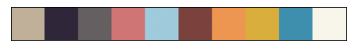

In [19]:
# visualize pallette
palette2(colors2)

#### colorgram.py

In [20]:
pip install colorgram.py

Note: you may need to restart the kernel to use updated packages.


In [21]:
import colorgram

# Extract 6 colors from an image.
colors3 = colorgram.extract(path[0], 10)

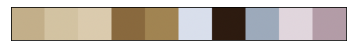

In [22]:
# visualize color palette
npcolors = np.zeros((10, 3))
for col in range(len(colors3)):
    for chan in range(3):
        npcolors[col, chan] = colors3[col].rgb[chan]
palette(npcolors)

### Selecting the main colors
#### Cut off low chroma colors and group the remaining colors to the corresponding colors on the RGB color wheel

In [23]:
# define functions
TOLERANCE = 1.0

def getMainColors(colors_arr, tolerance= 1.0):
    if len(colors_arr) == 0:
        return
    hsv_colors = rgb_to_hsv(colors_arr/255)
    chroma = hsv_colors[:,1] * hsv_colors[:,2]
    tolerance = tolerance
    cutoff = chroma.mean() - chroma.std() * tolerance
    to_remove = []
    
    for i in range(len(chroma)):
        #print(hsv_colors[i,0]*360) #display hue degrees
        if chroma[i] < cutoff:
            to_remove.append(i)
            
    mainColors = np.delete(colors_arr, to_remove, axis=0)
    return mainColors


def colorsOnWheel(colors_arr):
    # Outputs an array of presence of colors on the RGB color wheel up to tertiary colors (12-split)
    # Red=0,...,Green=4,...,Blue=8
    
    if len(colors_arr) == 0:
        return
    hues = rgb_to_hsv(colors_arr/255)[:,0]
    wheel = [0]*12
    for i in range(len(hues)):
        for c in range(12):
            lb = c*1/12 - 1/24
            ub = c*1/12 + 1/24
            if lb < hues[i] < ub:
                wheel[c] = 1
        if hues[i] > 11/12: 
            # if red > 345 degrees
            wheel[0] = 1
    return wheel

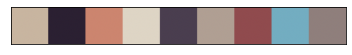

In [24]:
# get main colors of test_img
mainCols = getMainColors(colors, TOLERANCE)
palette(mainCols)

In [25]:
# get the corresponding colors on the RGB wheel
wheel = colorsOnWheel(mainCols)
wheel

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

### Classifying Algorithms

In [26]:
# get color harmony from mainColors
def getHarmony(wheelColors):
    # Get the corresponding colors on the RGB wheel from array of RGB colors
    w = wheelColors
    harmonies = np.array([monochromatic(w), complementary(w), splitComplementary(w), triad(w), square(w), rectangular(w), analogous(w), False]) * 1
    
    # If other color combinations
    if sum(w) > 1 and sum(harmonies)==0:
        harmonies[-1] = 1
    return harmonies
    
# Harmonies    
def monochromatic(wheelColors):
    return sum(wheelColors)==1


def complementary(wheelColors):
    for curr in range(12):
        opp = (curr+6) % 12
        if wheelColors[curr]==1 and wheelColors[opp]==1:
            return True
    return False


def splitComplementary(wheelColors):
    for curr in range(12):
        opp_left = (curr+5) % 12
        opp_right = (curr+7) % 12
        if wheelColors[curr]==1 and wheelColors[opp_left]==1 and wheelColors[opp_right]==1:
            return True
    return False


def triad(wheelColors):
    for curr in range(12):
        left = (curr+4) % 12
        right = (curr+8) % 12
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1:
            return True
    return False


def square(wheelColors):
    for curr in range(12):
        left = (curr+3) % 12
        right = (curr+9) % 12
        opp = (curr+6) % 12
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1:
            return True
    return False


def rectangular(wheelColors):
    for curr in range(6):
        for width in range(1,3):
            left = (curr+width) % 12
            right = (curr+6+width) % 12
            opp = (curr+6) % 12
            if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1:
                return True
    return False


def analogous(wheelColors):
    for curr in range(12):
        right = (curr+1) % 12
        if wheelColors[curr]==1 and wheelColors[right]==1:
            return True
    return False

In [27]:
# Display harmonies of test_img
labels = ["Monochromatic", "Complementary", "Split Complementary", "Triad", "Square", "Rectangular", "Analogous", "Other"]
harmony = getHarmony(wheel)
for i in range(len(harmony)):
    if harmony[i]: 
        print(labels[i])

Complementary
Analogous


### Label the dataset, study Harmony and Hue Distributions

In [28]:
# Find color harmonies of every illustration in our dataset
# If cloned Github repo, you should have the csv files ready to read --> skip to load saved files

from tqdm import tqdm

processed = 0
clusters = 10
harmonies = []
wheelColors_arr = []

# WARNING: takes ~ 3 hours for whole dataset
def analyzeImg(img):
    dc = DominantColors(img, clusters) 
    colors = dc.dominantColors()
    mainColors = getMainColors(colors)
    # get the corresponding colors on the RGB wheel
    wheel = colorsOnWheel(mainColors)
    harmony = getHarmony(wheel)
    return harmony, mainColors, wheel

for img in tqdm(imgs):
    harmony, mainColors, wheelColors = analyzeImg(img)
    harmonies.append(harmony)
    wheelColors_arr.append(wheelColors)
    processed += 1
    if processed % 200 == 0:
        print("processed", processed, "images")

  2%|▏         | 32/1537 [00:42<33:23,  1.33s/it]<ipython-input-12-9e28d3edaad2>:28: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(img)
 13%|█▎        | 200/1537 [04:27<32:39,  1.47s/it]

processed 200 images


 26%|██▌       | 400/1537 [08:50<24:05,  1.27s/it]

processed 400 images


 39%|███▉      | 600/1537 [13:12<20:00,  1.28s/it]

processed 600 images


 52%|█████▏    | 800/1537 [17:38<16:27,  1.34s/it]

processed 800 images


 55%|█████▍    | 841/1537 [18:33<15:16,  1.32s/it]<ipython-input-12-9e28d3edaad2>:28: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(img)
 61%|██████    | 934/1537 [20:35<13:52,  1.38s/it]<ipython-input-12-9e28d3edaad2>:28: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(img)
 65%|██████▌   | 1000/1537 [22:04<11:57,  1.34s/it]

processed 1000 images


 78%|███████▊  | 1200/1537 [26:29<07:35,  1.35s/it]

processed 1200 images


 80%|███████▉  | 1229/1537 [27:06<06:33,  1.28s/it]<ipython-input-12-9e28d3edaad2>:28: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(img)
 91%|█████████ | 1400/1537 [30:52<02:58,  1.31s/it]

processed 1400 images


100%|██████████| 1537/1537 [33:51<00:00,  1.32s/it]


In [29]:
# convert to numpy arrays
harmonies = np.array(harmonies)
wheelColors_arr = np.array(wheelColors_arr)

In [30]:
# save files as csv
np.savetxt("harmonies.csv", harmonies.astype(int), delimiter=',')
np.savetxt("wheelColors_arr.csv", wheelColors_arr.astype(int), delimiter=',')

In [31]:
# load saved files
harmonies = np.genfromtxt('harmonies.csv', delimiter=',')
wheelColors_arr = np.genfromtxt('wheelColors_arr.csv', delimiter=',')

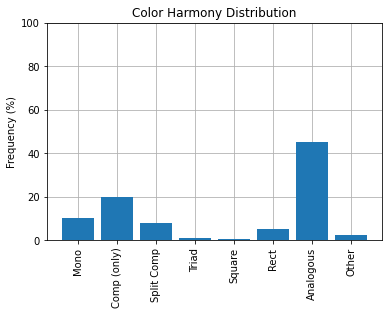

In [32]:
# plot frequencies
labels = ["Mono", "Comp (only)", "Split Comp", "Triad", "Square", "Rect", "Analogous", "Other"]
freq = np.sum(harmonies, axis=0) * 100 / 2551
freq[1] -= freq[4] + freq[5] # remove complementaries that we counted as rect & square

plt.bar(labels, freq, zorder=3)
plt.grid(zorder=0)
plt.title("Color Harmony Distribution")
plt.ylabel("Frequency (%)")
plt.ylim(0, 100)
plt.xticks(rotation='vertical')
plt.show()

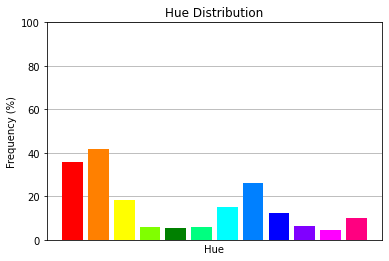

In [33]:
# plot frequencies
hue = range(0, 12)
bar_colors = ('r',(1,0.5,0),(1,1,0),(0.5,1,0),'g',(0,1,0.5),(0,1,1),(0,0.5,1),'b',(0.5,0,1),(1,0,1),(1,0,0.5))
freq = np.sum(wheelColors_arr, axis=0) * 100 / 2551
plt.bar(hue, freq, color=bar_colors, zorder=3)
plt.grid(zorder=0)
plt.title("Hue Distribution")
plt.ylabel("Frequency (%)")
plt.ylim(0, 100)
plt.xticks([])
plt.xlabel("Hue")
plt.show()